In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="xRlEgPN1r3JSUcDNY4i0")
project = rf.workspace("dockvision").project("lp-dataset-alpva")
dataset = project.version(1).download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.8 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=1d168804df153c6f2f2dc9337d75895edc2fbc93e51619b5956f16dde2ef72af
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.134`, to intall it `pip install ultralytics==8.0.134`.

Extracting Dataset Version Zip to LP-Dataset-1 in yolov8:: 100%|██████████| 9838/9838 [00:03<00:00, 3107.97it/s]


In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 4.5 MB/s eta 0:00:00


In [3]:
%cd /content/
!mkdir Data-Placas

/content


In [4]:
import os
import shutil

# Caminhos das pastas de imagens originais
train_folder = "/content/LP-Dataset-1/train/images"
validation_folder = "/content/LP-Dataset-1/valid/images"

# Caminho da pasta raiz para a estrutura desejada
root_folder = "/content/Data-Placas"

# Classe a ser mantida (substitua "old" pela classe desejada)
desired_class = "new"

# Função para reescrever o valor da classe para 0
def rewrite_label_content(label_content):
    # Substitui todas as ocorrências de 1 pela classe desejada (0)
    return label_content.replace("1", "0")

# Cria a estrutura de pastas
data_folder = os.path.join(root_folder, "data")
images_folder = os.path.join(data_folder, "images", "train")
labels_folder = os.path.join(data_folder, "labels", "train")

os.makedirs(images_folder, exist_ok=True)
os.makedirs(labels_folder, exist_ok=True)

# Move e reescreve os arquivos de imagens de treinamento
for filename in os.listdir(train_folder):
    src_path = os.path.join(train_folder, filename)
    dst_path = os.path.join(images_folder, filename)
    shutil.move(src_path, dst_path)

# Move e reescreve os arquivos de labels de treinamento
train_labels_folder = "/content/LP-Dataset-1/train/labels"  # Atualize o caminho correto
for filename in os.listdir(train_labels_folder):
    src_path = os.path.join(train_labels_folder, filename)
    with open(src_path, 'r') as src_file:
        label_content = src_file.read()
        rewritten_content = rewrite_label_content(label_content)
    dst_path = os.path.join(labels_folder, filename)
    with open(dst_path, 'w') as dst_file:
        dst_file.write(rewritten_content)

# Move e reescreve os arquivos de labels de validação
validation_labels_folder = "/content/LP-Dataset-1/valid/labels"  # Atualize o caminho correto
for filename in os.listdir(validation_labels_folder):
    src_path = os.path.join(validation_labels_folder, filename)
    with open(src_path, 'r') as src_file:
        label_content = src_file.read()
        rewritten_content = rewrite_label_content(label_content)
    label_filename = os.path.splitext(filename)[0] + ".txt"
    dst_path = os.path.join(labels_folder, label_filename)
    with open(dst_path, 'w') as dst_file:
        dst_file.write(rewritten_content)


In [5]:
ROOT_DIR = '/content/Data-Placas'

In [6]:
import os

# Caminho completo para o arquivo
file_path = '/content/Data-Placas/google_colab_config.yaml'

# Verifica se o diretório pai do arquivo existe, caso contrário, cria
os.makedirs(os.path.dirname(file_path), exist_ok=True)

# Conteúdo do arquivo
content = '''path: '/content/Data-Placas/data' # dataset root dir
train: images/train  # train images (relative to 'path')
val: images/train  # val images (relative to 'path')

# Classes
names:
   0: placa
'''

# Escreve o conteúdo no arquivo
with open(file_path, 'w') as f:
    f.write(content)

print('Arquivo criado com sucesso.')

Arquivo criado com sucesso.


In [ ]:
%cd /content/
import os

from ultralytics import YOLO


# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch

# Use the model
results = model.train(data=os.path.join(ROOT_DIR, "google_colab_config.yaml"), epochs=100)  # train the model

/content



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

# Definir o diretório de vídeos
VIDEOS_DIR = '/content'

# Nome do vídeo de entrada
video_name = '/content/SnapInsta.io-Placa para veículos com padrão Mercosul é lançada no Rio de Janeiro.mp4'

# Caminho completo do vídeo de entrada
video_path = os.path.join(VIDEOS_DIR, video_name)

# Caminho do vídeo de saída
video_path_out = '{}_out.mp4'.format(os.path.splitext(video_path)[0])

# Carregar o modelo treinado
model_path = '/content/runs/detect/train/weights/best.pt'
model = YOLO(model_path)

# Definir o limite de confiança
threshold = 0.5

# Definir os rótulos das classes
class_name_dict = {0: 'placa'}

# Abrir o vídeo de entrada
cap = cv2.VideoCapture(video_path)

# Verificar se o vídeo foi aberto corretamente
if not cap.isOpened():
    print("Erro ao abrir o vídeo.")
    exit()

# Obter as dimensões do primeiro frame
ret, frame = cap.read()
if not ret:
    print("Não foi possível ler o primeiro frame do vídeo.")
    exit()

H, W, _ = frame.shape

# Criar o objeto de gravação de vídeo de saída
out = cv2.VideoWriter(video_path_out, cv2.VideoWriter_fourcc(*'MP4V'), int(cap.get(cv2.CAP_PROP_FPS)), (W, H))

# Processar cada frame do vídeo
while ret:
    # Executar a inferência no modelo
    results = model(frame)[0]

    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result

        if score > threshold:
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
            cv2.putText(frame, class_name_dict[int(class_id)].upper(), (int(x1), int(y1 - 10)),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)

    # Salvar o frame processado no vídeo de saída
    out.write(frame)

    # Ler o próximo frame do vídeo de entrada
    ret, frame = cap.read()

# Fechar os objetos de vídeo
cap.release()
out.release()
cv2.destroyAllWindows()

A saída de streaming foi truncada nas últimas 5000 linhas.
0: 384x640 (no detections), 152.6ms
Speed: 4.8ms preprocess, 152.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 147.8ms
Speed: 4.4ms preprocess, 147.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 150.2ms
Speed: 4.8ms preprocess, 150.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 149.7ms
Speed: 3.2ms preprocess, 149.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 147.9ms
Speed: 2.8ms preprocess, 147.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 143.8ms
Speed: 5.6ms preprocess, 143.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 168.1ms
Speed: 5.1ms preprocess, 168.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 64


0: 448x640 2 placas, 237.8ms
Speed: 3.6ms preprocess, 237.8ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


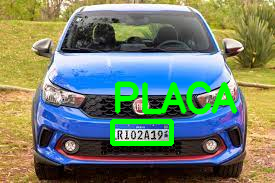

In [4]:
import os
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

# Caminho da imagem de entrada
image_path = '/content/download.jpeg'

# Carregar o modelo treinado
model_path = '/content/runs/detect/train/weights/best.pt'
model = YOLO(model_path)

# Definir o limite de confiança
threshold = 0.5

# Definir os rótulos das classes
class_name_dict = {0: 'placa'}

# Carregar a imagem de entrada
image = cv2.imread(image_path)

# Obter as dimensões da imagem
H, W, _ = image.shape

# Executar a inferência no modelo
results = model(image)[0]

for result in results.boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = result

    if score > threshold:
        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
        cv2.putText(image, class_name_dict[int(class_id)].upper(), (int(x1), int(y1 - 10)),
                    cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)

# Plotar a imagem com os retângulos e rótulos desenhados
cv2_imshow(image)

# Matriz de confusão

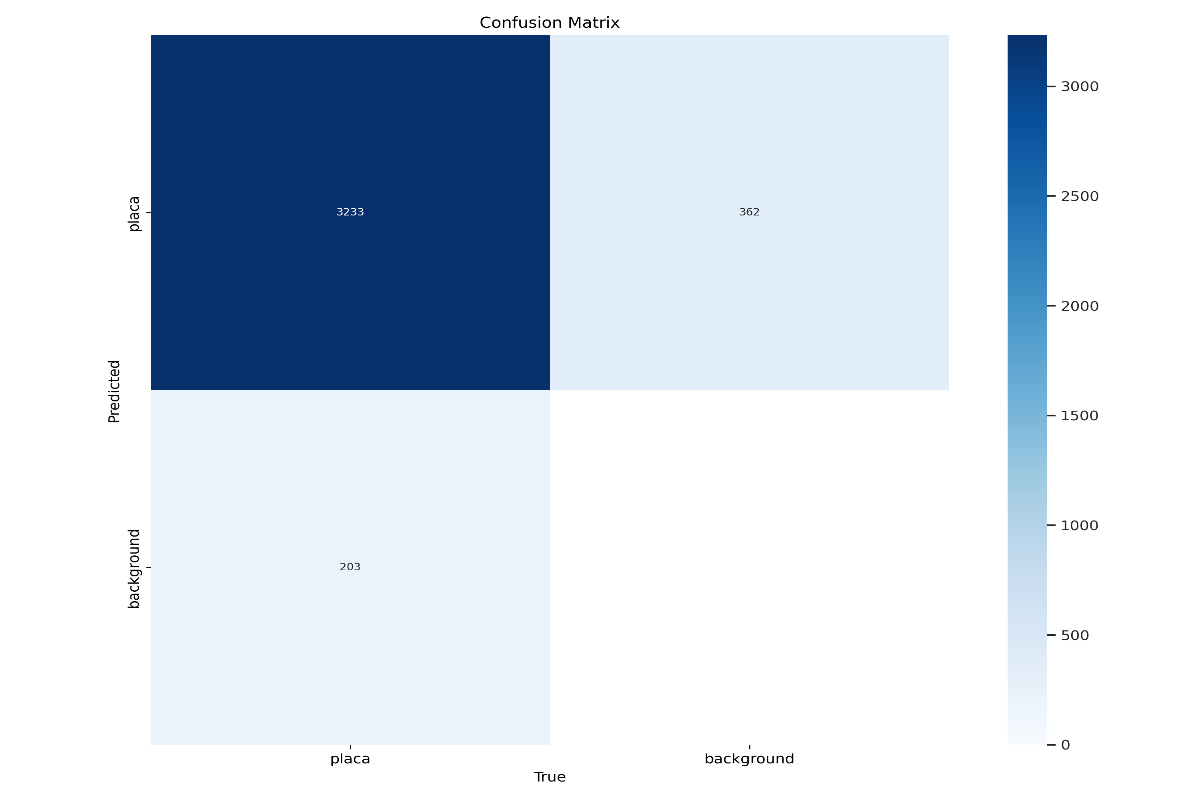

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Caminhos das imagens que você deseja plotar
image_paths = [
    '/content/runs/detect/train/confusion_matrix.png']

# Tamanho desejado para a imagem resultante
final_width = 1200
final_height = 800

# Carregar as imagens
images = [cv2.imread(image_path) for image_path in image_paths]

# Redimensionar as imagens para o tamanho desejado
for i in range(len(images)):
    images[i] = cv2.resize(images[i], (final_width, final_height))

# Criar uma imagem vazia para a saída
output_image = np.zeros((final_height, final_width * len(images), 3), dtype=np.uint8)

# Preencher a imagem de saída com as imagens redimensionadas
x_offset = 0
for image in images:
    output_image[:image.shape[0], x_offset:x_offset + image.shape[1]] = image
    x_offset += image.shape[1]

# Mostrar a imagem resultante
cv2_imshow(output_image)

# CURVA F1

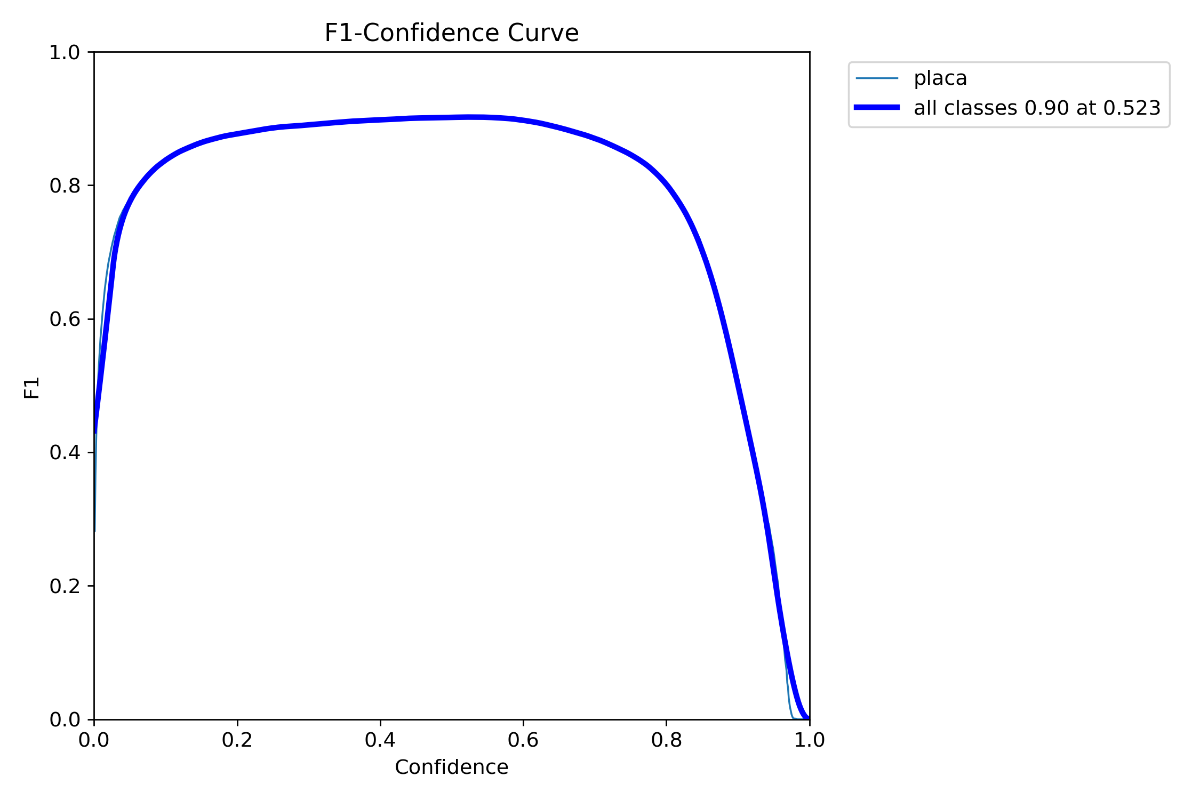

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Caminhos das imagens que você deseja plotar
image_paths = ['/content/runs/detect/train/F1_curve.png']

# Tamanho desejado para a imagem resultante
final_width = 1200
final_height = 800

# Carregar as imagens
images = [cv2.imread(image_path) for image_path in image_paths]

# Redimensionar as imagens para o tamanho desejado
for i in range(len(images)):
    images[i] = cv2.resize(images[i], (final_width, final_height))

# Criar uma imagem vazia para a saída
output_image = np.zeros((final_height, final_width * len(images), 3), dtype=np.uint8)

# Preencher a imagem de saída com as imagens redimensionadas
x_offset = 0
for image in images:
    output_image[:image.shape[0], x_offset:x_offset + image.shape[1]] = image
    x_offset += image.shape[1]

# Mostrar a imagem resultante
cv2_imshow(output_image)

# resultados

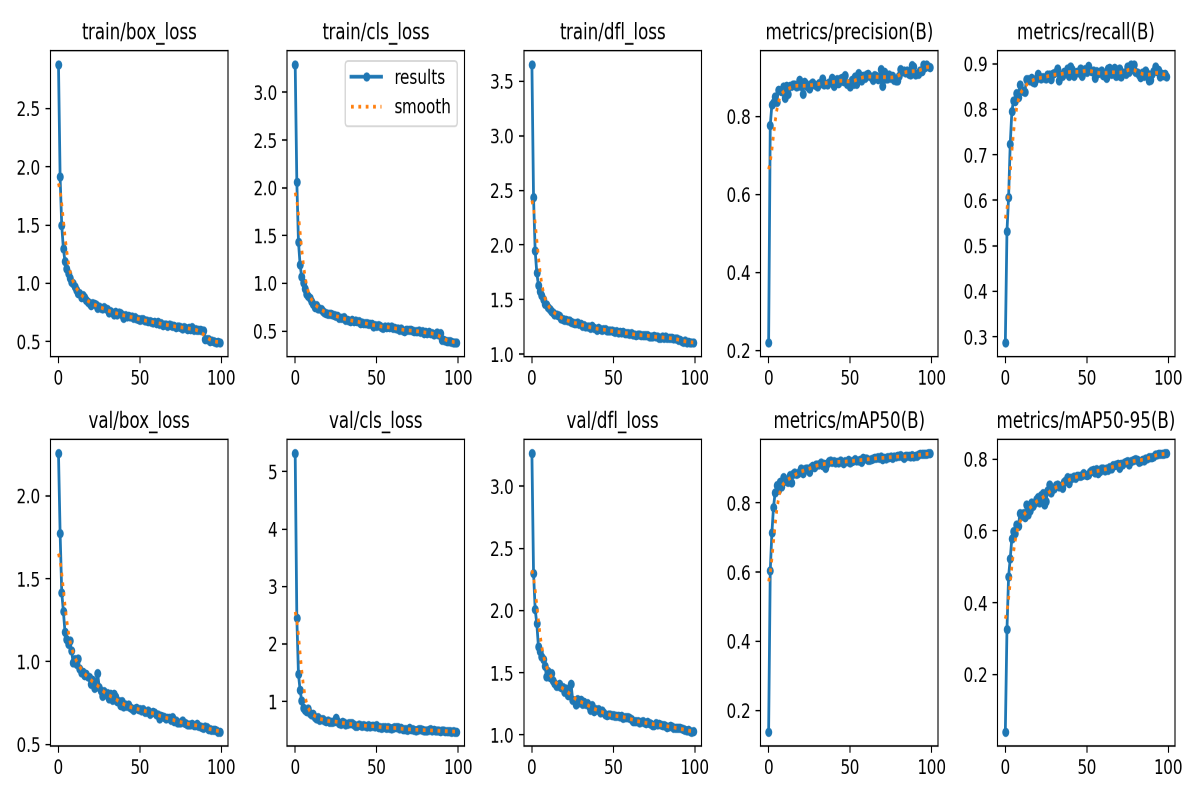

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import pandas as pd

# Caminhos das imagens que você deseja plotar
image_paths = ['/content/runs/detect/train/results.png']

# Tamanho desejado para a imagem resultante
final_width = 1200
final_height = 800

# Carregar as imagens
images = [cv2.imread(image_path) for image_path in image_paths]

# Redimensionar as imagens para o tamanho desejado
for i in range(len(images)):
    images[i] = cv2.resize(images[i], (final_width, final_height))

# Criar uma imagem vazia para a saída
output_image = np.zeros((final_height, final_width * len(images), 3), dtype=np.uint8)

# Preencher a imagem de saída com as imagens redimensionadas
x_offset = 0
for image in images:
    output_image[:image.shape[0], x_offset:x_offset + image.shape[1]] = image
    x_offset += image.shape[1]

# Mostrar a imagem resultante
cv2_imshow(output_image)